<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Exercícios de Aprendizagem de Máquina</font>

 Essa lista de exercícios foi criada para que vocês possam aplicar os conhecimentos que vocês adquiriram na aula que assistiram.

Podem tirar dúvidas com **Tales Nobre** e **Felipe Duarte** quando quiserem!
**O prazo de envio do notebook é até a reunião da próxima semana, até 1 hora antes da reunião, podem enviar colocar o conteúdo na branch de vocês do repositório**



🌍 [Link do drive com o Dataset](https://drive.google.com/drive/folders/1xi7m5gzJflujzoDvkPMkRO28SlR4139n?usp=sharing)


###**Objetivos**


*   Entender o nível de conhecimento individual de vocês
*   Estimular vocês a praticarem as formas básicas de avaliar um modelo


##**Observações**



*   Façam uma cópia desse notebook e realizem as questões.
*   Foquem no espaço de *Conclusões*, que aparece no final de cada questão, para explicar as conclusões que vocês chegaram a partir da análise de dados.
*   É recomendável que vocês acessem os materiais de apoio que serão disponibilizados em seguida.
*   Prezem pela organização, é muito importante explicar cada etapa de execução, principalmente no contexto de análise de dados.
*   Claro que vocês não vão precisam importar várias vezes as bibliotecas dentro de um mesmo notebook, mas por fins educativos é recomendado que vocês façam isso nessa lista de exercícios!
*   As questões são progressivas, ou seja, a quantidade de instruções e o nível de dificuldade mudarão ao longo da lista. **Lembre-se de manter o mesmo padrão em todas as questões.**
*  Divida em quantas células e caixas de texto quiser, afim de deixar a legibilidade do código a melhor possível.



🐼 Material de apoio:

Repositório de apoio:
*   [Repositório do Github](https://github.com/talesnobre/miniproject_ML/blob/main/models.py)

Matriz de Confusão:
*   [O que é?](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
*   [SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


F1 Score (Acurácia, Precisão e Recall):
*   [O que é?](https://medium.com/@mateuspdua/machine-learning-m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-e-recall-d44c72307959)
*   [SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Loss Function:
*   [O que é?](https://www.datarobot.com/blog/introduction-to-loss-functions/#:~:text=At%20its%20core%2C%20a%20loss,ll%20output%20a%20lower%20number.)
*   [SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)


Lembrem-se, a prática leva à perfeição!🧠

#**Questão 1: Doenças Cardíacas**




Use Acurácia, F1 Score, Matriz de confusão e Loss function para avaliar o desempenho do modelo.

## Dataset (Não precisam mexer)

In [1]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE


# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

print('Completed.')

C:\Users\Meu Computador\AppData\Local\Temp\ipykernel_40236\3142450267.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Completed.


In [2]:
df = pd.read_csv("C:/Users/Meu Computador/Trainees2/Notebook 4/heart.csv")

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [7]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # convert each label in the original dataset to the unique integer
print(y)

[0 0 0 ... 0 0 1]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (190260, 21)
y_train:  (190260,)
---
X_test:  (63420, 21)
y_test:  (63420,)


In [9]:
print("Length of y_true:", len(y_train))
print("Length of y_pred:", len(y_test))

Length of y_true: 190260
Length of y_pred: 63420


## Regresão Logística

In [10]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)



### Avaliação

In [11]:
precision_score(y_test, y_pred) * 100
# de todos os dados classificados como positivos, quantos são realmente positivos
# Pc = TP / (TP + FP)

49.56110735989196

In [52]:
recall_score(y_test, y_pred) * 100
# qual a porcentagem de dados classificados como positivos comparado com a quantidade real de positivos que existem na amostra.
# Recall = TP / (TP + FN)

12.45122985581001

In [53]:
#Acurácia simples
accuracy_score(y_test, y_pred) * 100
# Acc = (Verdadeiros Positivos(TP) + Verdadeiros Negativos(TN)) / (TP + TN + FP + FN) == "Total"
# T = True; F = False

90.68432671081678

In [54]:
#F1-Score
f1_score(y_test, y_pred) * 100
# F1 = 2 * precisão * recall / precisão + recall 
# essa métrica une precisão e recall afim de trazer um número único que determine a qualidade geral do nosso modelo.

19.902386117136658

In [68]:
#Loss Function
sklearn.metrics.log_loss(y_test, y_pred)


3.35770899121577

In [38]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56778   747]
 [ 5161   734]]


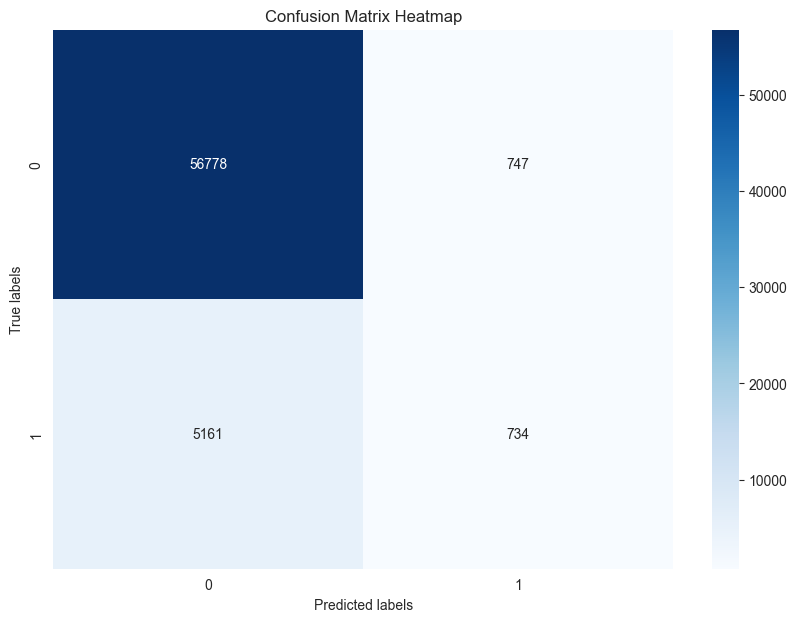

In [69]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [80]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=logistic_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use todas as CPUs disponíveis
)

In [81]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

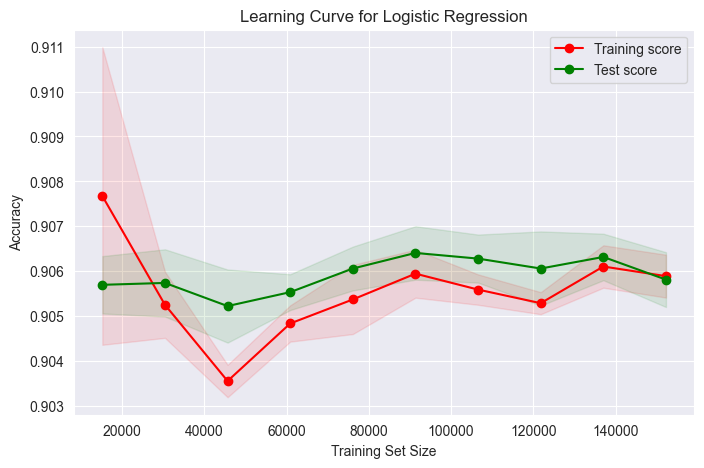

In [83]:
plt.figure(figsize=(8, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Conclusão

In [ ]:
conclusao = """
    Nessa análise, usando Regressão Logística, achei importante colocar mais células para cada tipo de dado que eu poderia me aproveitar, então, além
da accuracy e matriz de correlação, observar o recall e a precisão foram importante. Antes da análise, irei anotar algumas definições que acho
importante para prosseguir:

1. Regressão Logísitca: modelo estatístico, principalmente binário, que atua como uma "função linear"
- é simples para detectar varíaveis binários
- é fácil de entender, pelo menor nível de complexidade.

    Assim, reunindo os dados obtidos temos que:
        - Acurracy = 90.68%
        - Precision = 49.5%
        - Recall = 12.4%
        - F1_score = 20%
        - Loss Function = 3.35

    Analisando esses dados, podemos perceber que a acurácia é bem alta, então podemos dizer que o modelo foi bom para o propósito, dado os dados
existentes. Contudo, como o F1_score é baixo e a Loss Function relativamente alto, pode indicar alguns erros:
    - Analisando o gráfico, o modelo apresenta algumas variações de curva de aprendizado e vai equiparando com o teste, então, muito dificilmente
o modelo está overfitado. A conclusão que eu consegui pensar foi na de *Desbalanceamento dos Dados*, provavelmente o F1 Score está baixo pois o modelo
está de certa forma, "tendecioso" para identificar alguns dados, mas não outros.
"""

print(conclusao)

## Rede Neural

In [7]:
neural_network_model = MLPClassifier()
neural_network_model.fit(X_train, y_train)

y_pred = neural_network_model.predict(X_test)


### Avaliação

In [100]:
precision_score(y_test, y_pred) * 100
# de todos os dados classificados como positivos, quantos são realmente positivos
# Pc = TP / (TP + FP)

50.38434661076171

In [101]:
recall_score(y_test, y_pred) * 100
# qual a porcentagem de dados classificados como positivos comparado com a quantidade real de positivos que existem na amostra.
# Recall = TP / (TP + FN)

12.230703986429177

In [102]:
#Acurácia simples
accuracy_score(y_test, y_pred) * 100
# Acc = (Verdadeiros Positivos(TP) + Verdadeiros Negativos(TN)) / (TP + TN + FP + FN) == "Total"
# T = True; F = False

90.72216966256701

In [103]:
#F1-Score
f1_score(y_test, y_pred) * 100
# F1 = 2 * precisão * recall / precisão + recall 
# essa métrica une precisão e recall afim de trazer um número único que determine a qualidade geral do nosso modelo.

19.683319683319684

In [104]:
#Loss Function
sklearn.metrics.log_loss(y_test, y_pred)

3.344069008854704

In [105]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56815   710]
 [ 5174   721]]


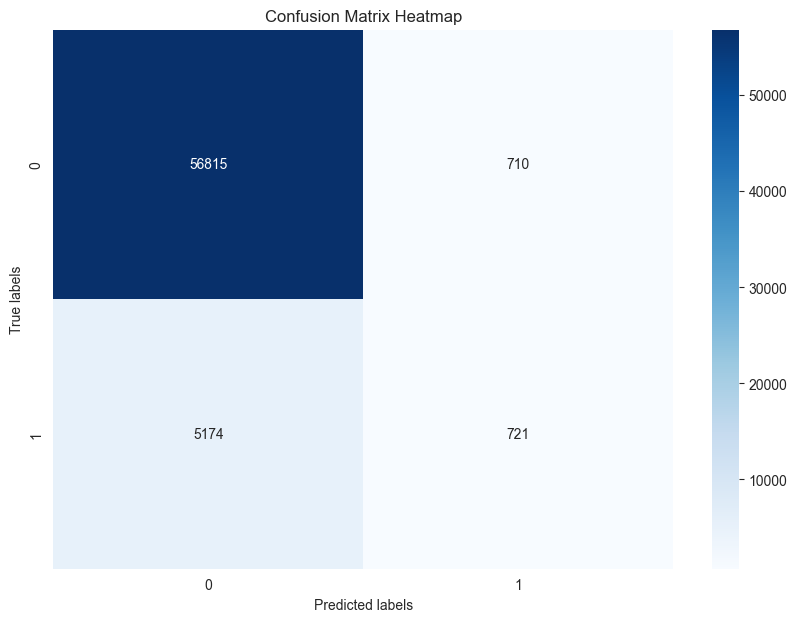

In [106]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [55]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=neural_network_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use todas as CPUs disponíveis
)

In [56]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

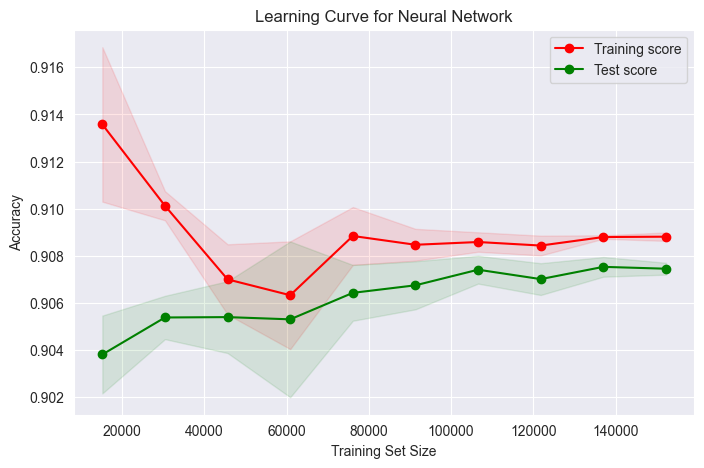

In [57]:
plt.figure(figsize=(8, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")

plt.title("Learning Curve for Neural Network")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Conclusão

In [ ]:
conclusao = """
    Aqui, com o modelo baseado em Rede Neural, da mesma forma que na célula de conclusão anterior, vou anotar uma definição de Rede Neural e os dados
obtidos nas células anteriores.

    Redes Neurais: São baseadas num comportamento de um neurônio animal, onde fão constituindo "sinapses" e interligando com dados até um "output".
Diferente da Regressão logística, não é algo linear, e os resultados são muitas vezes guiados pelos "pesos" de importância da informação obtida. Como
é possível colocar mais dados e interligar com dados diferentes, atende casos mais complexos e gerais.

    Reunindo os dados obtidos, temos que:
        - Acurracy: 90.79%
        - Precision: 55.5%
        - Recall: 8.17%
        - F1 Score: 14.25%
        - Loss Function: 3.29%

    Com esses dados, podemos compara que com o modelo anterior, praticamente toda as métrica são parecidas. Aqui, porém, o F1 score é ainda menor
que o modelo anterior. Logo, olhando apenas para esses números, consigo pensar que há algum problema com os dados, pois mesmo com a acurracy alta,
o F1 Score ser baixo em dois modelos distintos me parece estranho, além da Loss Function alta. Portanto, provalmente o erro está em como os dados estão
organizados, e os modelos de aprendizado se guiam por um "viés".
"""

print(conclusao)

#**Questão 2: Raças de cachorro**




Use Acurácia, F1 Score, Matriz de confusão e Loss function para avaliar o desempenho do modelo.

### Dataset (Não precisam mexer)

In [58]:
df = pd.read_csv("C:/Users/Meu Computador/Trainees2/Notebook 4/dogs.csv")

In [33]:
df.head()

,group,popularity,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,average_height,average_expectancy
0,Toy Group,0.230366,0.50,0.50,0.50,0.75,1.00,0.15,0.794118
1,Hound Group,0.413613,0.75,0.00,0.75,0.00,0.00,0.78,0.794118
2,Terrier Group,0.691099,0.50,0.25,0.50,1.00,0.75,0.66,0.735294
3,Working Group,0.759162,0.75,0.50,0.75,1.00,0.50,0.78,0.676471
4,Working Group,0.701571,0.50,0.50,0.75,0.25,0.75,0.70,0.705882


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     277 non-null    object 
 1   popularity                277 non-null    float64
 2   grooming_frequency_value  277 non-null    float64
 3   shedding_value            277 non-null    float64
 4   energy_level_value        277 non-null    float64
 5   trainability_value        277 non-null    float64
 6   demeanor_value            277 non-null    float64
 7   average_height            277 non-null    float64
 8   average_expectancy        277 non-null    float64
dtypes: float64(8), object(1)
memory usage: 19.6+ KB


In [16]:
grupos = df["group"].value_counts()
grupos

group
Foundation Stock Service    68
Hound Group                 32
Sporting Group              32
Terrier Group               31
Working Group               31
Herding Group               30
Toy Group                   21
Non-Sporting Group          21
Miscellaneous Class         11
Name: count, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("group", axis=1), df["group"], test_size=0.25, random_state=42)



## Nayve Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB #nb normal (sem ser gaussiano)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

model = GaussianNB()

model.fit(X_train, y_train)
predicted = model.predict(X_test)


### Avaliação

In [61]:
precision_score(y_test, predicted, average='weighted') * 100
# de todos os dados classificados como positivos, quantos são realmente positivos
# Pc = TP / (TP + FP)

53.93887858173573

In [20]:
recall_score(y_test, predicted, average='weighted') * 100
# qual a porcentagem de dados classificados como positivos comparado com a quantidade real de positivos que existem na amostra.
# Recall = TP / (TP + FN)

54.285714285714285

In [21]:
#Acurácia simples
accuracy_score(y_test, predicted) * 100
# Acc = (Verdadeiros Positivos(TP) + Verdadeiros Negativos(TN)) / (TP + TN + FP + FN) == "Total"
# T = True; F = False

54.285714285714285

In [22]:
#F1-Score
f1_score(y_test, predicted, average='weighted') * 100
# F1 = 2 * precisão * recall / precisão + recall 
# essa métrica une precisão e recall afim de trazer um número único que determine a qualidade geral do nosso modelo.

52.408984106463095

In [87]:
print(y_test)

30          Miscellaneous Class
126                 Hound Group
220                 Hound Group
142                   Toy Group
255          Non-Sporting Group
                 ...           
192              Sporting Group
242    Foundation Stock Service
67     Foundation Stock Service
132    Foundation Stock Service
154              Sporting Group
Name: group, Length: 70, dtype: object


In [60]:
#Matriz de confusão
cm = confusion_matrix(y_test, predicted)
print(cm)

[[16  0  0  1  0  0  0  0  0]
 [ 0  2  0  0  1  4  1  0  2]
 [ 0  0  6  0  1  1  2  0  1]
 [ 2  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  1  2  0]
 [ 0  1  2  0  0  2  0  0  1]
 [ 0  0  1  0  0  0  4  1  0]
 [ 0  0  1  0  1  0  3  3  0]
 [ 0  0  1  0  0  0  0  0  4]]


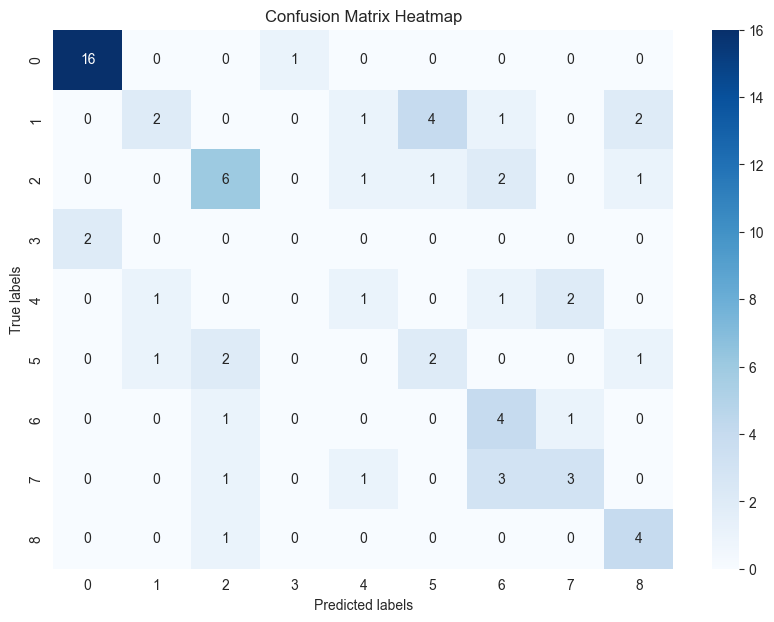

In [61]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [62]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use todas as CPUs disponíveis
)

In [63]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

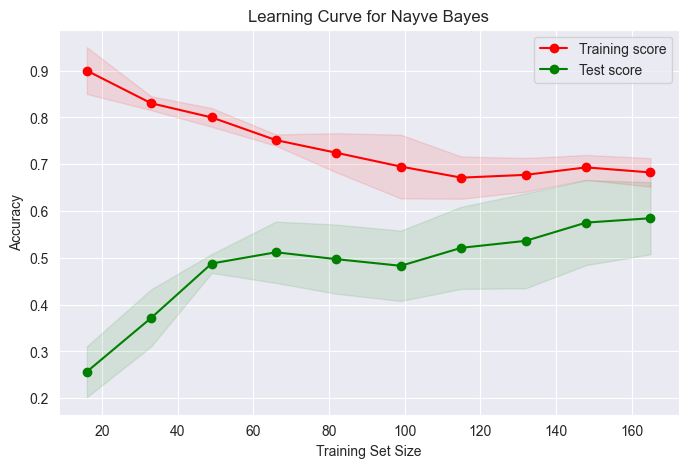

In [64]:
plt.figure(figsize=(8, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")

plt.title("Learning Curve for Nayve Bayes")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Conclusão

In [ ]:
conclusao = """
    Nesse modelo, Nayve Bayes, basicamente, vários grupos distintos são postos juntos (nesse caso, grupos de cachorros distintos), e por vários dados
que são passados, ele dá como resposta esses diferentes grupos baseado em dados em comum. Uma boa forma de visualizar seria com várias formas geométricas
juntas, mas que seriam colocadas em "caixas" separadas após passar pelo algoritmo.
    Nesse sentido, Os resultados que obtive aqui foram o que fizeram mais sentido pra mim. Apesar da accuracy "baixa", o F1 Score está muito próximo,
então, possivelmente significa que o algoritmo conseguiu colocar em "caixas" os diferentes grupos, mas algumas estão muito próximas de outras, o que
explicaria a baixa accuracy. 
    Logo, uma possível melhoria seria ou no algoritmo usado, ou, mais possívelmente, existir mais dados que contribuissem para uma maior distinção, já
que, em comparação com o dataset anterior, esse tem muito menos dados, então o espaço amostral de treino da IA foi muito menor. Aém disso, a visualização do 
gráfico de aprendizagem ajuda a perceber que provavelmente não há overfitting/underfitting, pois não apresentava crescimentos lineares ou constantes
de aprendizado.
"""

print(conclusao)

## Multi-Layer Perceptron


In [80]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=42, max_iter=1000).fit(X_train, y_train)
predicted2 = clf.predict(X_test)

In [81]:
precision_score(y_test, predicted2, average='weighted') * 100
# de todos os dados classificados como positivos, quantos são realmente positivos
# Pc = TP / (TP + FP)

31.25

In [82]:
recall_score(y_test, predicted2, average='weighted') * 100
# qual a porcentagem de dados classificados como positivos comparado com a quantidade real de positivos que existem na amostra.
# Recall = TP / (TP + FN)

35.714285714285715

In [83]:
#Acurácia simples
accuracy_score(y_test, predicted2) * 100
# Acc = (Verdadeiros Positivos(TP) + Verdadeiros Negativos(TN)) / (TP + TN + FP + FN) == "Total"
# T = True; F = False

35.714285714285715

In [84]:
#F1-Score
f1_score(y_test, predicted2, average='weighted') * 100
# F1 = 2 * precisão * recall / precisão + recall 
# essa métrica une precisão e recall afim de trazer um número único que determine a qualidade geral do nosso modelo.

31.487940630797777

In [34]:
#Matriz de confusão
cm = confusion_matrix(y_test, predicted)
print(cm)

[[16  0  0  1  0  0  0  0  0]
 [ 0  2  0  0  1  4  1  0  2]
 [ 0  0  6  0  1  1  2  0  1]
 [ 2  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  1  2  0]
 [ 0  1  2  0  0  2  0  0  1]
 [ 0  0  1  0  0  0  4  1  0]
 [ 0  0  1  0  1  0  3  3  0]
 [ 0  0  1  0  0  0  0  0  4]]


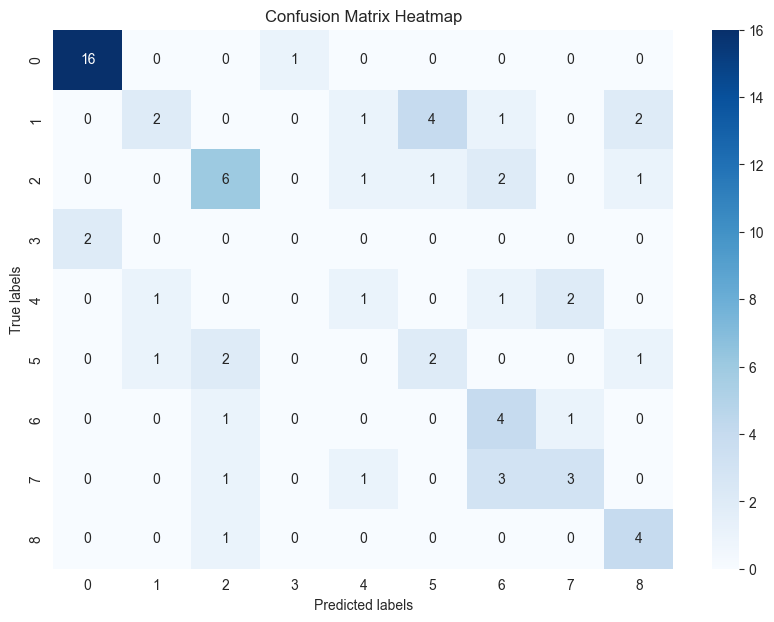

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [73]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=clf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use todas as CPUs disponíveis
)

In [74]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

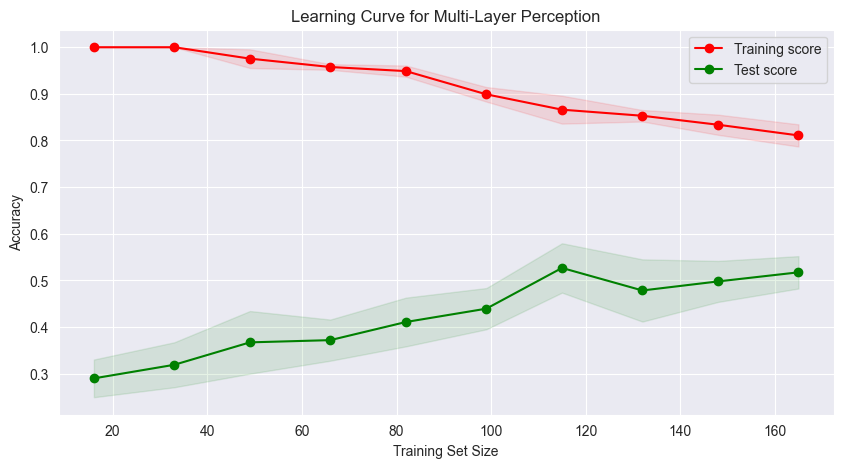

In [76]:
plt.figure(figsize=(10, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")

plt.title("Learning Curve for Multi-Layer Perception")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Conclusão

In [86]:
conclusao = """
    Nesse modelo, o multi-layer perceptron, é um pouco parecido com redes neurais, onde há a tentativa de imitar um neurônio animal, onde as 
ramificações de informações são criadas a partir de um determinado reconhecimento de padrão.
    Sabendo dessa informação, e comparando com o resultado do modelo anterior, a accuracy diminui, assim como o F1 Score, que a acompanhou. Logo, podemos
concluir, além do resultado do modelo anterior em relação aos dados, que esse modelo de aprendizado de máquina não é o melhor para esses tipos de dados.
Isso ocorre pois mesmo com os mesmos dados nas mesmas condições, houve um resultado pior, sendo realmente uma consequência do modelo usado.
"""

print(conclusao)